In [1]:
import numpy as np

def load_data(header):
    X = np.loadtxt(header+'_X.csv')
    Y = np.loadtxt(header+'_Y.csv')
    return X, Y

data3 = load_data('../assets/resources/logistic_data3')
data4 = load_data('../assets/resources/logistic_data4')

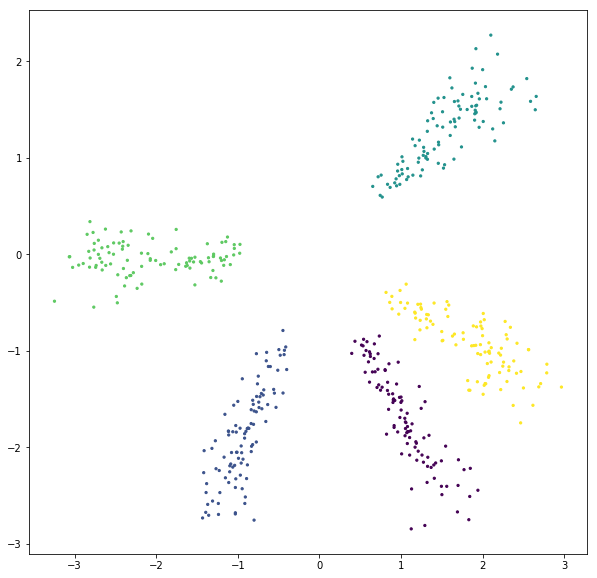

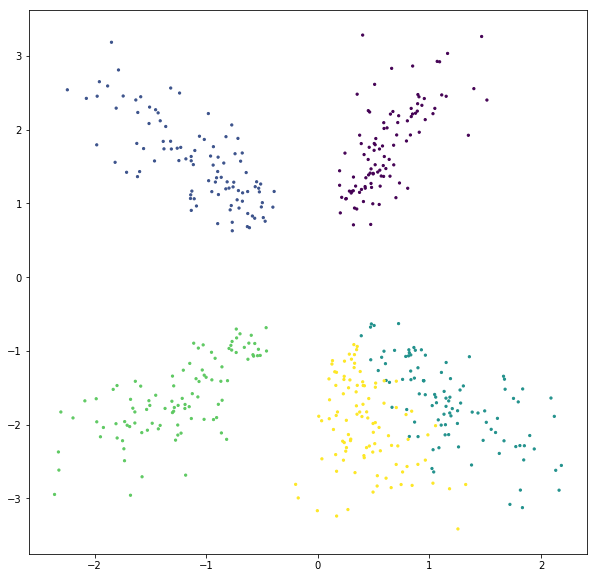

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_data(X, Y, class_vector=None, show=True):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(X[:,0], X[:,1], s=5, c=Y)
    
    if class_vector is not None:
        num_class = np.unique(Y).shape[0]
        color = np.asarray(list(range(num_class)))
        plt.scatter(
            class_vector[:,0],
            class_vector[:,1],
            s=100,
            c=color,
            marker='*'
        )

    if show:
        plt.show()    
    return fig

fig3 = show_data(data3[0], data3[1])
fig4 = show_data(data4[0], data4[1])

## multi class classification

In [91]:
from sklearn.linear_model import LogisticRegression

def multiclass_classification(X, Y):
    logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    logistic.fit(X, Y)
    return logistic.coef_

def one_vs_others_classification(X, Y):
    coefs = []
    unique_labels = np.unique(Y)
    for label in unique_labels:
        Y_ = Y.copy()
        Y_[np.where(Y == label)[0]] = 1
        Y_[np.where(Y != label)[0]] = -1
        logistic = LogisticRegression(multi_class='ovr', solver='lbfgs')
        logistic.fit(X, Y_)
        coefs.append(logistic.coef_[0])
    coefs = np.asarray(coefs)
    return coefs

def oneclass_classification(X, Y):
    coefs = []
    unique_labels = np.unique(Y)

    for label in unique_labels:

        indices = np.where(Y == label)[0]

        X_pos = X[indices]
        X_neg = negative_samples(X_pos)

        logistic = LogisticRegression(multi_class='ovr', solver='lbfgs')
        logistic.fit(X_, Y_)
    coefs = np.asarray(coefs)
    return coefs

def negative_samples(X_pos):
    return X_pos

# coef3_mc = multiclass_classification(data3[0], data3[1])
# coef4_mc = multiclass_classification(data4[0], data4[1])
# coef3_1vso = one_vs_others_classification(data3[0], data3[1])
# coef4_1vso = one_vs_others_classification(data4[0], data4[1])
coef4_1class = oneclass_classification(data4[0], data4[1])

[0.62551751 1.77023244]
[-1.0793599   1.55567014]
[ 1.19224864 -1.70575688]
[-1.25399963 -1.62424136]
[ 0.4306452 -2.0129144]


In [88]:
coef4_1class

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

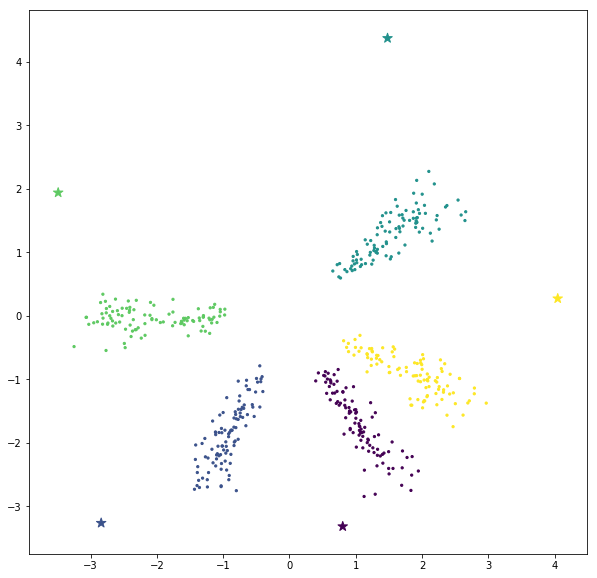

In [18]:
fig3_mc = show_data(data3[0], data3[1], coef3_mc)

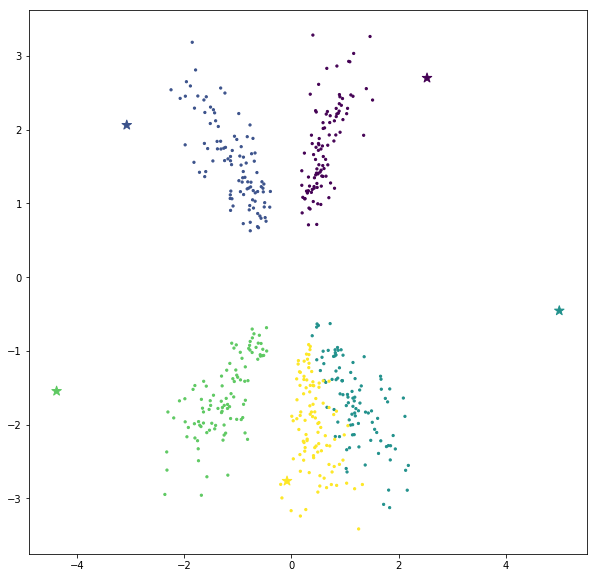

In [19]:
fig4_mc = show_data(data4[0], data4[1], coef4_mc)

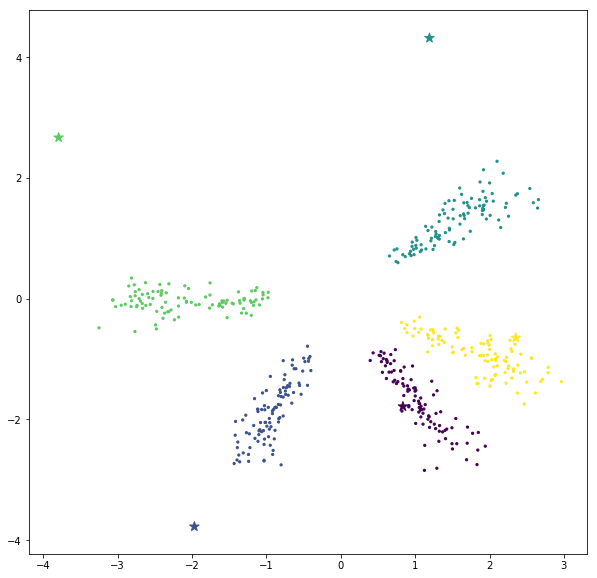

In [20]:
fig3_1vso = show_data(data3[0], data3[1], coef3_1vso)

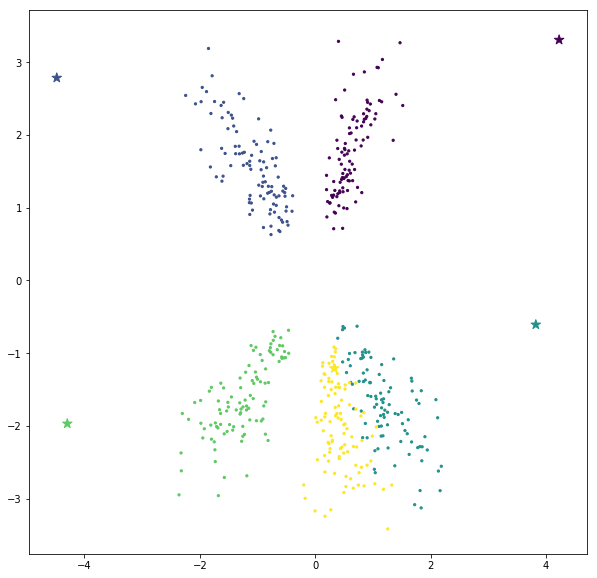

In [21]:
fig4_1vso = show_data(data4[0], data4[1], coef4_1vso)

In [22]:
from sklearn.preprocessing import normalize
print(normalize(coef4_mc))

print(coef4_mc)

[[ 0.68379433  0.7296748 ]
 [-0.83007841  0.55764669]
 [ 0.99588799 -0.09059311]
 [-0.94303926 -0.33268146]
 [-0.02910487 -0.99957636]]
[[ 2.53176096  2.70163424]
 [-3.07095733  2.0630692 ]
 [ 4.99989018 -0.45482586]
 [-4.3801949  -1.54522691]
 [-0.08049891 -2.76465066]]


In [23]:
print(normalize(coef4_1vso))

print(coef4_1vso)

[[ 0.78763216  0.61614574]
 [-0.84935966  0.52781453]
 [ 0.98757209 -0.15716668]
 [-0.90912016 -0.41653394]
 [ 0.26252242 -0.96492589]]
[[ 4.22417284  3.30446905]
 [-4.4777008   2.78256156]
 [ 3.8203897  -0.60799404]
 [-4.29529098 -1.96798461]
 [ 0.32882489 -1.20862686]]


In [24]:
fig3_mc.savefig('logistic_multiclass_data3_mc.png')
fig3_1vso.savefig('logistic_multiclass_data3_1vso.png')
fig4_mc.savefig('logistic_multiclass_data4_mc.png')
fig4_1vso.savefig('logistic_multiclass_data4_1vso.png')